In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv


## Step-1: Data Loading

In [2]:
df = pd.read_csv('/kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv')

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [6]:
df.rename(columns ={
    'X1': 'Relative_Compactness', 
    'X2': 'Surface_Area' , 
    'X3': 'Wall_Area',
    'X4': 'Roof_Area', 
    'X5': 'Overall_Height', 
    'X6': 'Orientation', 
    'X7': 'Glazing_Area', 
    'X8': 'Glazing_Area_Distribution', 
    'Y1': 'Heating_Load', 
    'Y2': 'Cooling_Load'
}, inplace=True)

In [7]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

## Step-2:Data Exploration

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


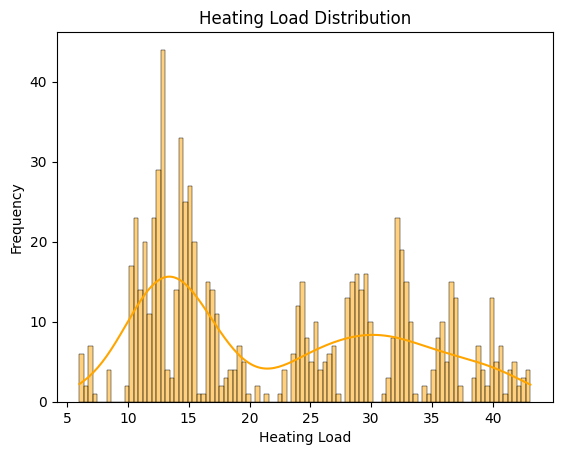

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot
sns.histplot(df['Heating_Load'], kde=True, bins=100, color='orange')
plt.title('Heating Load Distribution')
plt.xlabel('Heating Load')
plt.ylabel('Frequency')
plt.show()


* Distribution Shape:
    * The distribution appears bimodal, with two distinct peaks:
    * The first peak is around a heating load of 15.
    * The second peak is between 30 and 35.
    * This suggests the dataset may include two distinct groups of buildings with different heating efficiency characteristics.
* Skewness:
    * The data is slightly right-skewed, with most buildings having heating loads between 10 and 20, while higher heating loads (above 35) are less common.
* Range:
    * The heating load spans approximately from 5 to 45, with the majority concentrated in the range 10–35.
* Density:
    * The highest density is observed around 15, indicating that many buildings have relatively low heating load requirements.
* Tail Behavior:
    * The right tail (above 35) gradually decreases, indicating that buildings with very high heating loads are rare but do exist.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


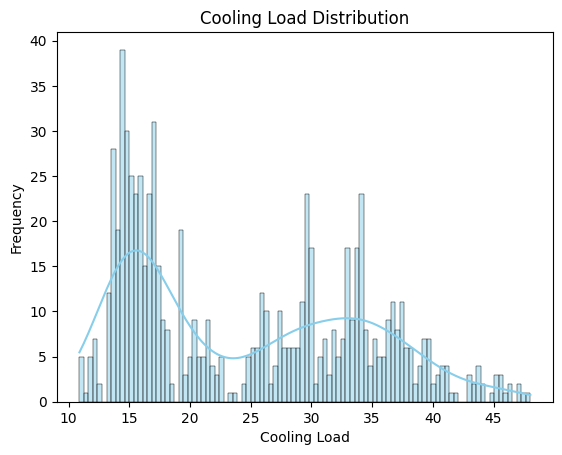

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot
sns.histplot(df['Cooling_Load'], kde=True, bins=100, color='skyblue')
plt.title('Cooling Load Distribution')
plt.xlabel('Cooling Load')
plt.ylabel('Frequency')
plt.show()



* Skewed Distribution:
    * The distribution is slightly right-skewed, indicating that most buildings in the dataset have lower cooling loads (around 15–25).
    * Higher cooling loads (above 30) are less frequent, with very few buildings having loads above 40.
* Modes:
    * There appear to be multiple peaks in the distribution, suggesting the presence of distinct clusters or groups in the dataset.
    * This might reflect differences in building characteristics (e.g., relative compactness, wall area, glazing area).
* Range:
    * The Cooling Load spans approximately from 10 to 45, with the majority concentrated between 15 and 30.
* Density:
    * The highest density of data points lies in the range of 15–20, indicating that many buildings are optimized for lower cooling loads.
* Tail Behavior:
    * The right tail of the distribution shows a gradual decline, suggesting that extreme cooling loads are rare.

<Axes: >

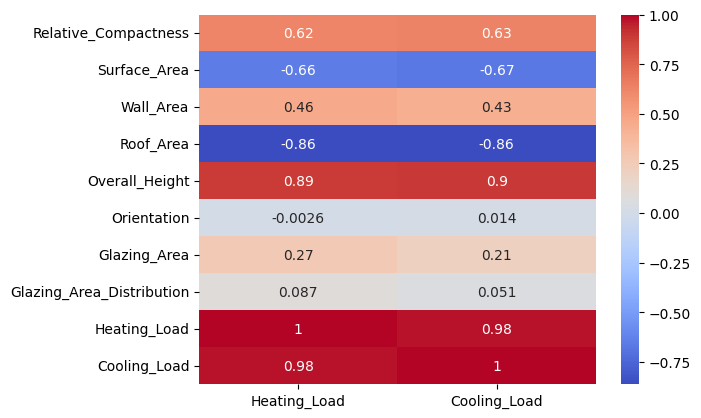

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr()[['Heating_Load','Cooling_Load']]
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [12]:
# Define groups for Heating_Load
def classify_heating(value):
    if value <= 20:
        return 0  # Low
    elif value <= 30:
        return 1  # Medium
    else:
        return 2  # High

# Define groups for Cooling_Load
def classify_cooling(value):
    if value <= 20:
        return 0  # Low
    elif value <= 30:
        return 1  # Medium
    else:
        return 2  # High

# Apply to the dataset
df['Heating_Class'] = df['Heating_Load'].apply(classify_heating)
df['Cooling_Class'] = df['Cooling_Load'].apply(classify_cooling)

# Display the updated dataset
print(df[['Heating_Load', 'Heating_Class', 'Cooling_Load', 'Cooling_Class']].head())


   Heating_Load  Heating_Class  Cooling_Load  Cooling_Class
0         15.55              0         21.33              1
1         15.55              0         21.33              1
2         15.55              0         21.33              1
3         15.55              0         21.33              1
4         20.84              1         28.28              1


In [13]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Heating_Class,Cooling_Class
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760,0.744792,0.877604
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306,0.845248,0.877426
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000,0.000000,0.000000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000,0.000000,0.000000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000,0.000000,1.000000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500,2.000000,2.000000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000,2.000000,2.000000


### Analysis of classification - Heating Load vs. Cooling Load

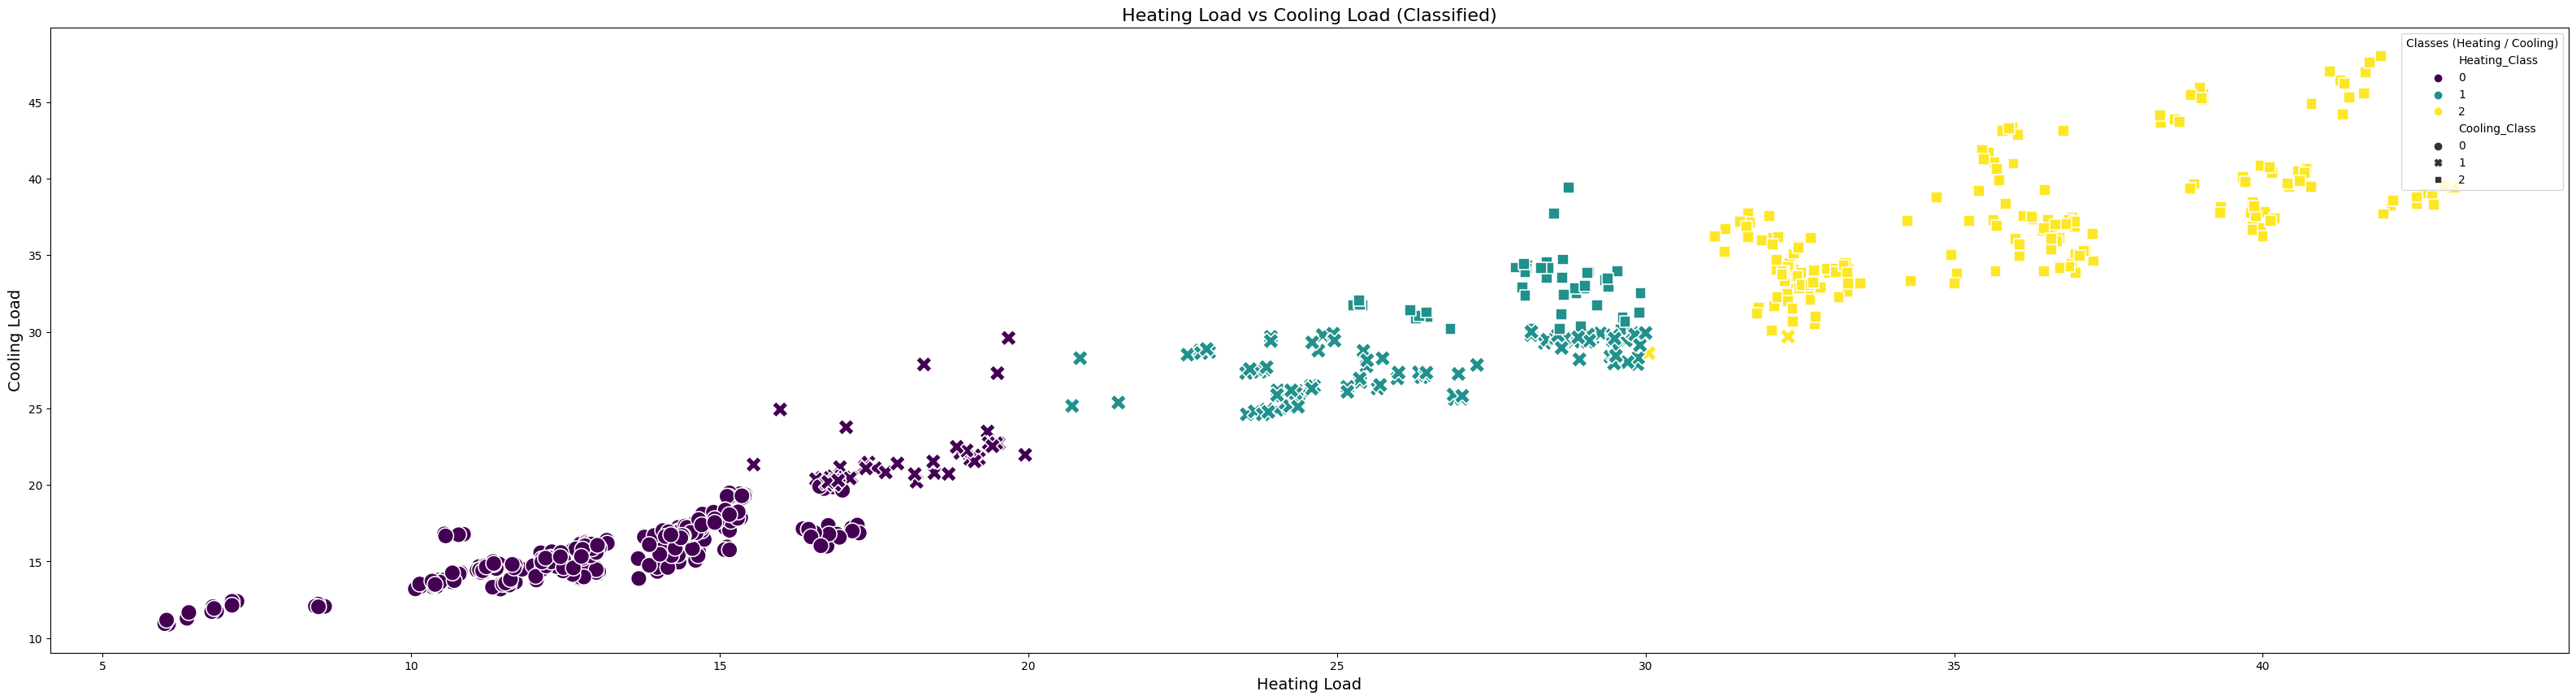

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with Heating_Class and Cooling_Class as hue
plt.figure(figsize=(40, 10))
sns.scatterplot(
    data=df,
    x="Heating_Load",
    y="Cooling_Load",
    hue="Heating_Class",
    style="Cooling_Class",
    palette="viridis",
    s=200
)
plt.title("Heating Load vs Cooling Load (Classified)", fontsize=16)
plt.xlabel("Heating Load",fontsize=14)
plt.ylabel("Cooling Load",fontsize=14)
plt.legend(title="Classes (Heating / Cooling)", loc="upper right")
plt.show()



* There is a strong positive correlation between Heating_Load and Cooling_Load.
* The data is well-separated into three Heating_Class groups (0, 1, 2) and three Cooling_Class groups (0, 1, 2).
* Buildings in Heating_Class 0 (low heating load) tend to also fall under Cooling_Class 0 or Cooling_Class 1.
* Higher heating load (Heating_Class 2) corresponds mostly to higher cooling load (Cooling_Class 2).



Patterns:
* The separation between classes indicates that the classification criteria (thresholds for heating and cooling) effectively group the data into meaningful categories.
* The Cooling_Class variations (indicated by different shapes) are visible across the heating classes, showing additional granularity.


### Average Heating Load by Heating and Cooling Classes

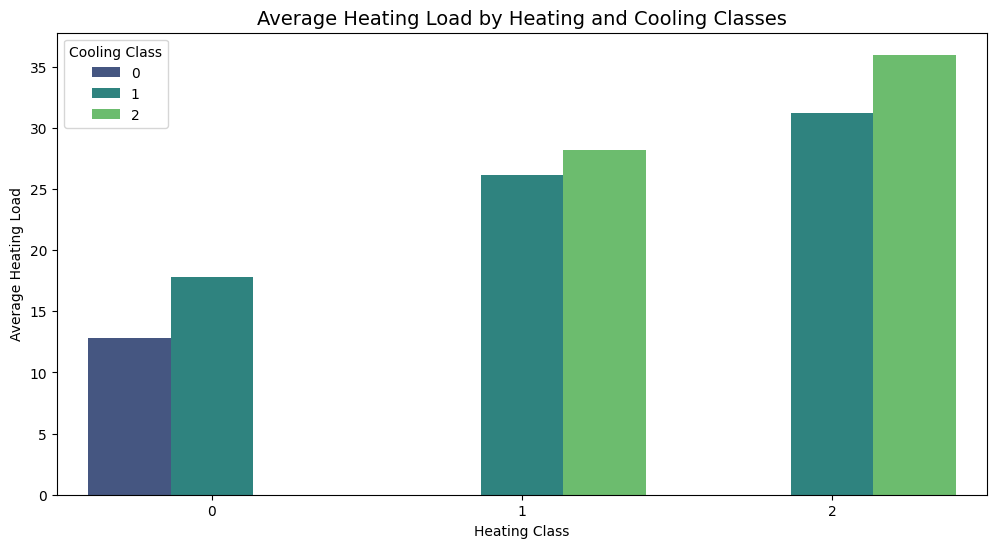

In [15]:

# Compute average heating and cooling loads per class
avg_data = df.groupby(['Heating_Class', 'Cooling_Class'])[['Heating_Load', 'Cooling_Load']].mean().reset_index()

# Bar plot for Heating and Cooling Classes
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_data, x="Heating_Class", y="Heating_Load", hue="Cooling_Class", palette="viridis")
plt.title("Average Heating Load by Heating and Cooling Classes", fontsize=14)
plt.xlabel("Heating Class")
plt.ylabel("Average Heating Load")
plt.legend(title="Cooling Class", loc="upper left")
plt.show()



* As Heating_Class increases, the average Heating_Load increases significantly.
* For each Heating_Class, buildings in Cooling_Class 2 have higher average Heating_Load than those in Cooling_Class 1 or Cooling_Class 0.
* There’s a consistent trend where buildings with higher cooling loads (Cooling_Class 2) also tend to have higher heating loads.

* Patterns:
    * The relationship between heating and cooling classes suggests that buildings with higher energy requirements for heating often need more cooling, possibly due to inefficiencies in insulation or design


### Heatmap of Heating and Cooling Classes

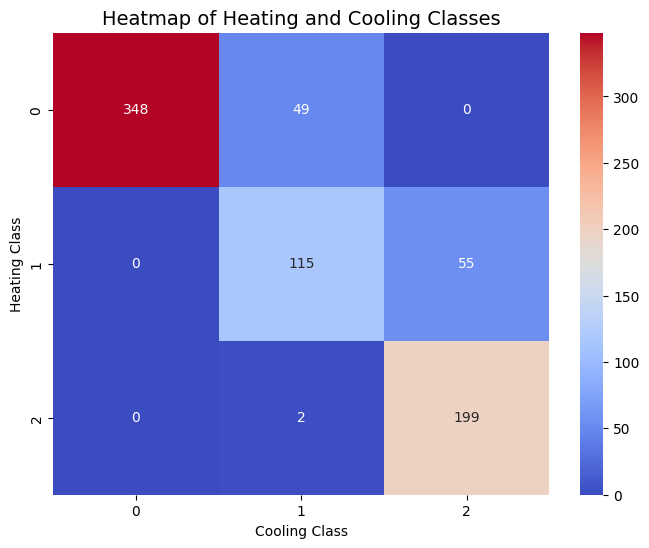

In [16]:
# Heatmap of Heating_Class and Cooling_Class distribution
heatmap_data = df.groupby(['Heating_Class', 'Cooling_Class']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Heating and Cooling Classes", fontsize=14)
plt.xlabel("Cooling Class")
plt.ylabel("Heating Class")
plt.show()


* Most buildings fall into the Heating_Class 0 and Cooling_Class 0 category, indicating a majority of energy-efficient buildings in the dataset.
* The second most frequent group is Heating_Class 2 and Cooling_Class 2, representing buildings with both high heating and cooling requirements.
* There is a small number of buildings in Heating_Class 1 with Cooling_Class 2.

* Patterns:
    * The heatmap confirms that energy efficiency (low heating and cooling classes) is prevalent in the dataset.
    * The data is highly concentrated along diagonal elements (Heating_Class aligns with Cooling_Class), reinforcing the correlation between the two.

<Axes: >

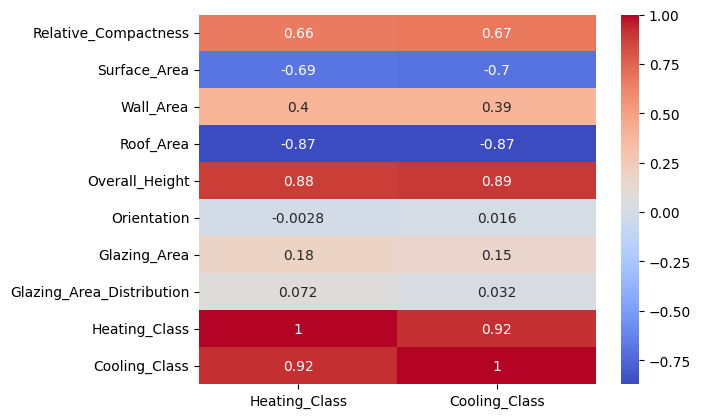

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.drop(columns=['Heating_Load', 'Cooling_Load']).corr()[['Heating_Class', 'Cooling_Class']]
sns.heatmap(correlation, annot=True, cmap='coolwarm')

* Glazing_Area and Glazing_Area_Distribution show weak correlations with both Heating_Class and Cooling_Class.
* These features seem to have minimal influence compared to others.
* Overall_Height (0.89) and Relative_Compactness (0.67) are also strongly positively correlated with cooling_class.
* Roof_Area (-0.87) and Surface_Area (-0.70) are strongly negatively correlated with Cooling_Class
* Glazing_Area and Glazing_Area_Distribution show weak correlations with both Heating_Class and Cooling_Class. These features seem to have minimal influence compared to others.
* Orientation has negligible correlation with both Heating_Class (-0.0028) and Cooling_Class (0.016), suggesting it plays little role in determining heating or cooling efficiency.

## Step-3:Data Preprocessing

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC

# Features and multi-output target
X = df[['Overall_Height', 'Relative_Compactness', 'Roof_Area', 'Surface_Area']]
y = df[['Heating_Class', 'Cooling_Class']]  # Multi-output target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step-4: Model Training

In [20]:
# Initialize the SVM model
svm = SVC()

# Wrap SVM in MultiOutputClassifier
multi_output_model = MultiOutputClassifier(svm)
multi_output_model.fit(X_train, y_train)


MultiOutputClassifier(estimator=SVC())

#### Why I Used MultiOutputClassifier?

* **SVM Handles Only Single Output:**
    * Standard Support Vector Machines (SVMs) are designed for single-output classification, meaning they can only predict one target variable at a time (e.g., Heating_Class or Cooling_Class).
    * Since your task requires predicting both Heating_Class and Cooling_Class simultaneously, you need a wrapper like MultiOutputClassifier.
      
* **Separate Models for Each Target:**
    * MultiOutputClassifier creates and trains a separate SVM model for each target variable (in this case, one for Heating_Class and another for Cooling_Class).
    * This approach allows each target to be modeled independently while still being trained in a unified framework.

* **Simplified Workflow:**
    * Using MultiOutputClassifier lets you work with a single fit() and predict() method to train and predict multiple outputs, instead of training multiple models manually.


## Step-5: Model Evaluation

In [21]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = multi_output_model.predict(X_test)

# Evaluate each output
for i, target in enumerate(['Heating_Class', 'Cooling_Class']):
    print(f"\nClassification Report for {target}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))
    
    print(f"Accuracy for {target}: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")



Classification Report for Heating_Class:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.65      0.97      0.78        36
           2       0.96      0.63      0.76        43

    accuracy                           0.87       154
   macro avg       0.87      0.85      0.84       154
weighted avg       0.91      0.87      0.87       154

Accuracy for Heating_Class: 0.8701298701298701

Classification Report for Cooling_Class:

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        63
           1       0.60      0.24      0.35        37
           2       0.72      0.89      0.79        54

    accuracy                           0.78       154
   macro avg       0.73      0.71      0.69       154
weighted avg       0.75      0.78      0.74       154

Accuracy for Cooling_Class: 0.7792207792207793


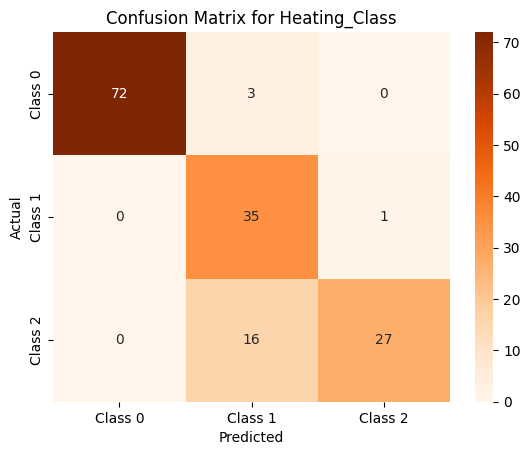

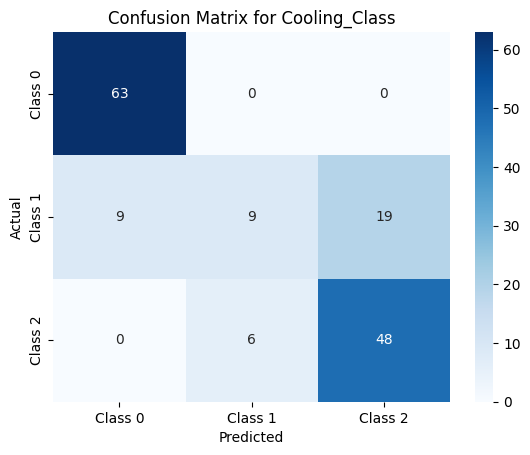

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for Heating_Class
cm_heating = confusion_matrix(y_test['Heating_Class'], y_pred[:, 0])
sns.heatmap(cm_heating, annot=True, fmt="d", cmap="Oranges", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix for Heating_Class")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for Cooling_Class
cm_cooling = confusion_matrix(y_test['Cooling_Class'], y_pred[:, 1])
sns.heatmap(cm_cooling, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix for Cooling_Class")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
multi_output_model.get_params()

{'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(),
 'n_jobs': None}

In [24]:
# Assuming 'df' is your DataFrame
y_heating = df['Heating_Class']
y_cooling = df['Cooling_Class']


In [25]:
from sklearn.model_selection import train_test_split

# For Heating_Class
X_train_heating, X_test_heating, y_train_heating, y_test_heating = train_test_split(
    X, y_heating, test_size=0.2, random_state=42
)

# For Cooling_Class
X_train_cooling, X_test_cooling, y_train_cooling, y_test_cooling = train_test_split(
    X, y_cooling, test_size=0.2, random_state=42
)

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear'],
    #'probability': [True,False],
    #'tol': [0.001,0.001],
    #'shrinking': [True,False],
    #'verbose': [True,False]
}

# For Heating_Class
svc_heating = SVC(shrinking=False)
grid_search_heating = GridSearchCV(svc_heating, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_heating.fit(X_train_heating, y_train_heating)

# For Cooling_Class
svc_cooling = SVC(shrinking=False)
grid_search_cooling = GridSearchCV(svc_cooling, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_cooling.fit(X_train_cooling, y_train_cooling)



GridSearchCV(cv=5, estimator=SVC(shrinking=False), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [27]:
grid_search_heating.best_params_

{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

In [28]:
grid_search_cooling.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [29]:
from sklearn.metrics import classification_report

# Predictions
y_pred_heating = grid_search_heating.predict(X_test_heating)
y_pred_cooling = grid_search_cooling.predict(X_test_cooling)

# Evaluation
print("Heating_Class Classification Report:")
print(classification_report(y_test_heating, y_pred_heating))

print("Cooling_Class Classification Report:")
print(classification_report(y_test_cooling, y_pred_cooling))


Heating_Class Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.74      0.78      0.76        36
           2       0.80      0.81      0.80        43

    accuracy                           0.88       154
   macro avg       0.84      0.85      0.85       154
weighted avg       0.88      0.88      0.88       154

Cooling_Class Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        63
           1       0.67      0.70      0.68        37
           2       0.80      0.83      0.82        54

    accuracy                           0.84       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.85      0.84      0.85       154



In [30]:
# Initialize the SVM model
svm = SVC(
    kernel='rbf',
    gamma= 'auto',
    C=0.1,
    probability= True
)

svm.fit(X_train_cooling, y_train_cooling)

from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred_cooling_2 = svm.predict(X_test_cooling)

In [31]:
print(classification_report(y_test_cooling, y_pred_cooling_2))
print(round(accuracy_score(y_test_cooling, y_pred_cooling_2),2))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        63
           1       0.67      0.70      0.68        37
           2       0.80      0.83      0.82        54

    accuracy                           0.84       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.85      0.84      0.85       154

0.84
